In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import scikitplot
sns.set()

### Loading the Data 

In [2]:
data = sm.datasets.fair.load_pandas().data

In [3]:
data['affair'] = (data.affairs > 0).astype(int)

In [4]:
data.shape

(6366, 10)

In [5]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,6366.0,4.109645,0.961430,1.0,4.0,4.0,5.000000,5.000000
age,6366.0,29.082862,6.847882,17.5,22.0,27.0,32.000000,42.000000
yrs_married,6366.0,9.009425,7.280120,0.5,2.5,6.0,16.500000,23.000000
children,6366.0,1.396874,1.433471,0.0,0.0,1.0,2.000000,5.500000
religious,6366.0,2.426170,0.878369,1.0,2.0,2.0,3.000000,4.000000
educ,6366.0,14.209865,2.178003,9.0,12.0,14.0,16.000000,20.000000
occupation,6366.0,3.424128,0.942399,1.0,3.0,3.0,4.000000,6.000000
occupation_husb,6366.0,3.850141,1.346435,1.0,3.0,4.0,5.000000,6.000000
affairs,6366.0,0.705374,2.203374,0.0,0.0,0.0,0.484848,57.599991
affair,6366.0,0.322495,0.467468,0.0,0.0,0.0,1.000000,1.000000


### Splitting data into independent and target variables

In [7]:
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',data, return_type="dataframe")

In [8]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [9]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [10]:
data.shape

(6366, 10)

### Exploring the Data

In [11]:
data.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [12]:
data.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [13]:
# show plots in the notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


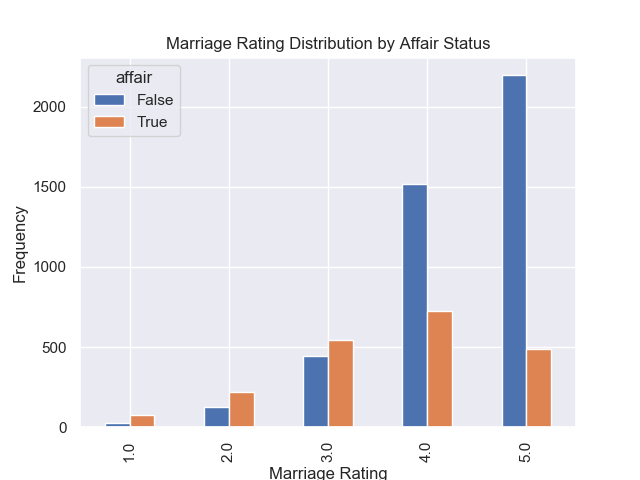

Text(0, 0.5, 'Frequency')

In [14]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(data.rate_marriage, data.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

<IPython.core.display.Javascript object>


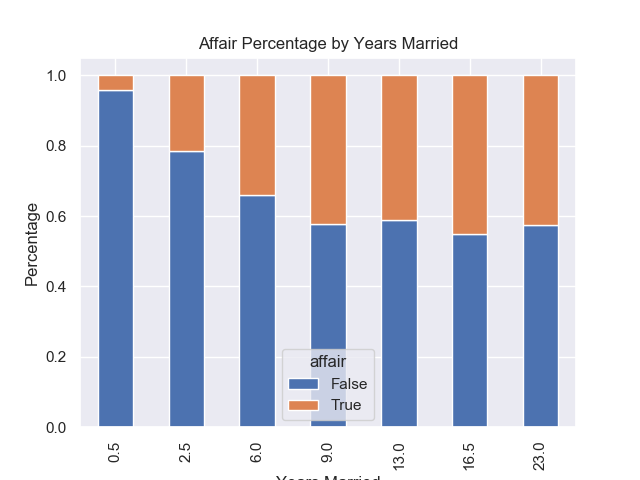

Text(0, 0.5, 'Percentage')

In [15]:
affair_yrs_married = pd.crosstab(data.yrs_married, data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

<IPython.core.display.Javascript object>


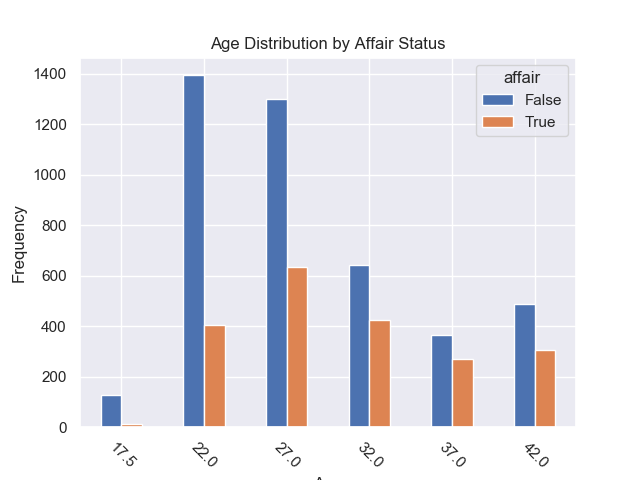

Text(0, 0.5, 'Frequency')

In [16]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(data.age, data.affair.astype(bool)).plot(kind='bar')
plt.title('Age Distribution by Affair Status')
plt.xlabel('Age')
plt.xticks(rotation = -45)
plt.ylabel('Frequency') 

### Partioning the Data into train and test sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=100, stratify=y)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4774, 17)
(1592, 17)
(4774,)
(1592,)


### Using Statsmodels Logit function for Logistic Regression

In [19]:
logit = sm.Logit(y_train,X_train)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.541726
         Iterations 6


In [30]:
predictions = result.predict(X_test) 
predictions

6357    0.227393
1057    0.226655
4101    0.158316
5360    0.265422
4833    0.251891
          ...   
4855    0.616523
5820    0.737734
2947    0.225167
3043    0.351160
4349    0.137099
Length: 1592, dtype: float64

In [ ]:
### Performing Chi-Square test to check correlation between c

In [35]:
from scipy import stats 
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4774
Model:                          Logit   Df Residuals:                     4757
Method:                           MLE   Df Model:                           16
Date:                Fri, 03 Jul 2020   Pseudo R-squ.:                  0.1385
Time:                        12:43:58   Log-Likelihood:                -2586.2
converged:                       True   LL-Null:                       -3001.9
Covariance Type:            nonrobust   LLR p-value:                1.275e-166
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.7967      0.669      4.183      0.000       1.486       4.107
occ_2             0.5910      0.528      1.120      0.263      -0.443       1.625
occ_3             0.8701      0.521      1.671      0.095      -0.150       1.890
occ_4             0.6322      0.522      1.211      0.226      -0.391       1.655
occ_5             1.2098      0.527      2.296      0.022       0.177       2.242
occ_6             1.1917      0.579      2.059      0.040       0.057       2.326
occ_husb_2        0.1576      0.213      0.739      0.460      -0.260       0.576
occ_husb_3        0.2872      0.233      1.234      0.217      -0.169       0.743
occ_husb_4        0.1423      0.207      0.689      0.491      -0.263       0.547
occ_husb_5        0.1046      0.209      0.501      0.616      -0.304       0.514
occ_husb_6        0.2387      0.231      1.032      0.302      -0.215       0.692
rate_marriage    -0.7239      0.037    -19.701      0.000      -0.796      -0.652
age              -0.0561      0.012     -4.736      0.000      -0.079      -0.033
yrs_married       0.1058      0.013      8.409      0.000       0.081       0.131
children          0.0130      0.037      0.350      0.726      -0.060       0.086
religious        -0.3896      0.040     -9.637      0.000      -0.469      -0.310
educ             -0.0021      0.020     -0.103      0.918      -0.041       0.037
=================================================================================
"""

### Applying Logistic Regression Algorithm for Classification

In [20]:
model = LogisticRegression()
model.fit(X_train,y_train)

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Checking the score on training set

In [21]:
model.score(X_train,y_train)

0.7268537913699205

In [22]:
predicted = model.predict(X_test)
predicted

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
probs = model.predict_proba(X_test)
probs

array([[0.78301139, 0.21698861],
       [0.77846417, 0.22153583],
       [0.83700368, 0.16299632],
       ...,
       [0.78317219, 0.21682781],
       [0.63158046, 0.36841954],
       [0.85714695, 0.14285305]])

### Checking the score on testing set

In [24]:
print(metrics.accuracy_score(y_test, predicted))

0.714824120603015


### Checking the Area under the Curve score for the model on test set

In [25]:
print(metrics.roc_auc_score(y_test, probs[:,1]))

0.7469635627530364


### Plotting the Confusion Matrix

<IPython.core.display.Javascript object>


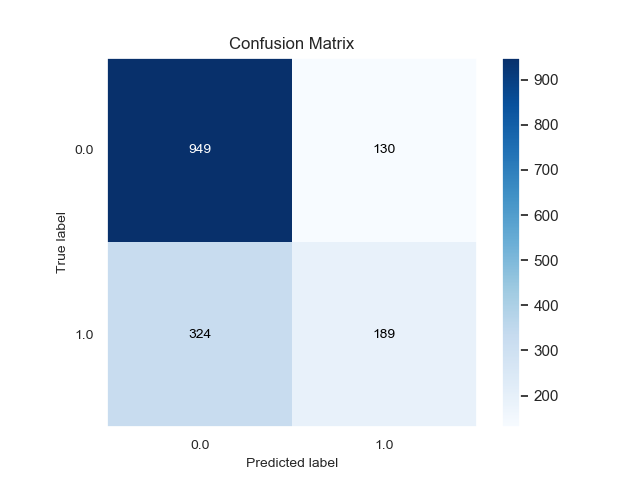

In [26]:
scikitplot.metrics.plot_confusion_matrix(y_test, predicted)

### Plotting the ROC Curves for both the classes

D:\Programs\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>


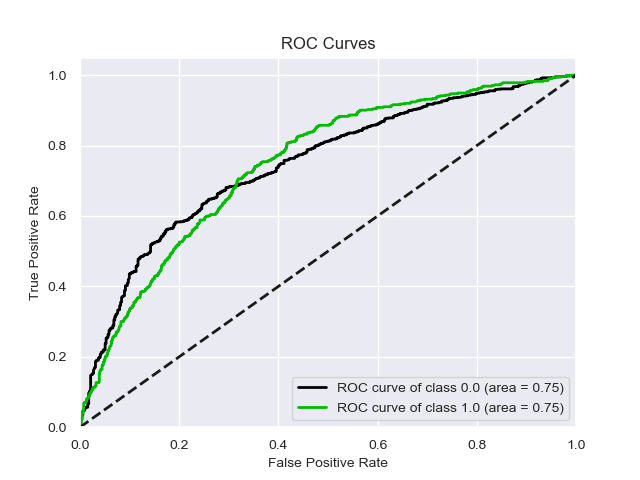

In [27]:
scikitplot.metrics.plot_roc_curve(y_test, probs, curves=['each_class'])

### Generating the Classification Report for the model 

In [28]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81      1079
         1.0       0.59      0.37      0.45       513

    accuracy                           0.71      1592
   macro avg       0.67      0.62      0.63      1592
weighted avg       0.70      0.71      0.69      1592



### Performing 10 fold cross validation to avoid overfitting

In [29]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10) 
print(scores)
print(scores.mean())

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.72056515 0.69544741 0.73626374 0.70800628 0.71585557 0.72841444
 0.72641509 0.70440252 0.75471698 0.75157233]
0.7241659508505869
